In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
sys.path.append('../')

import shutil
from train import run
import os

def write_errormsg2file(msg, error_file_name):
    if not os.path.isfile(error_file_name):
        with open(error_file_name, 'w') as f:
            f.write(f'error : {msg}\n')
    else:
        with open(error_file_name, 'a') as f:
            f.write(f'error : {msg}\n')

In [3]:
def do_exps(Ts, rotation_lambdas, lr_Hs, lambda_scale_factors, img_sizes, device, exp_dir = '../figs/test', save_special= False):
    exp_idx=0
    for img_size in img_sizes:
        for T in Ts:
            for rotation_lambda in rotation_lambdas:
                for lr_H in lr_Hs:
                    for lambda_scale_factor in lambda_scale_factors:

                        exp_idx+=1

                        name= f'exp_idx({exp_idx})'
                        save_dir= f'{exp_dir}/img_size({img_size})@T({T})@rotation_lambda({rotation_lambda})@lr_H({lr_H})@lambda_scale_factor({lambda_scale_factor})'
                        H_enable_train=str(lr_H!='0.0')

                        try:shutil.rmtree(save_dir)
                        except:pass

                        opts = [
                            'NAME', name,
                            'GENERAL.device', device,
                            'GENERAL.save_dir', save_dir,
                            'MODEL.MODEL_H.T', T,
                            'MODEL.MODEL_H.lr_H', lr_H,
                            'MODEL.MODEL_H.enable_train', H_enable_train,
                            'MODEL.MODEL_A.scale_factor', lambda_scale_factor,
                            'MODEL.MODEL_A.rotation_lambda',rotation_lambda,
                            'DATASET.img_size', img_size,
                            'MODEL.MODEL_H.H_init', 'fft_uniform_unity',
                            
                            'TRAIN.show_results_epoch', 1
                            
                        ]
                
                                                
                        try:
                            run(opts= opts, save_special=save_special)
                        except:
                            error_file_name = f'{exp_dir}/errors.txt'
                            write_errormsg2file(f'ERROR : {save_dir}', error_file_name)
                            print(f'ERROR : {save_dir}')

In [4]:
exp_dir= '../figs/mnistv12'

In [5]:
!rm -rf $exp_dir
!mkdir $exp_dir

Overide opts :  ['NAME', 'exp_idx(1)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/mnistv12/img_size(64)@T(1)@rotation_lambda(10.0)@lr_H(1.0)@lambda_scale_factor(1)', 'MODEL.MODEL_H.T', '1', 'MODEL.MODEL_H.lr_H', '1.0', 'MODEL.MODEL_H.enable_train', 'True', 'MODEL.MODEL_A.scale_factor', '1', 'MODEL.MODEL_A.rotation_lambda', '10.0', 'DATASET.img_size', '64', 'MODEL.MODEL_H.H_init', 'fft_uniform_unity', 'TRAIN.show_results_epoch', 1]
DATASET:
  batch_size: 32
  delta: 1e-06
  img_channels: 1
  img_size: 64
GENERAL:
  device: cuda:0
  save_dir: ../figs/mnistv12/img_size(64)@T(1)@rotation_lambda(10.0)@lr_H(1.0)@lambda_scale_factor(1)
  torch_seed: 10
MODEL:
  MODEL_A:
    exPSF: torch.tensor(impulse(side_len=5)).float().to(device)
    noise: True
    rotation_lambda: 10.0
    sPSF: torch.tensor(impulse(side_len=5)).float().to(device)
    scale_factor: 1
    shift_lambda_real: 10.0
  MODEL_DECODER:
    channel_list: [24, 12, 8, 4, 2]
    last_activation: sigmoid
    lr_decoder:

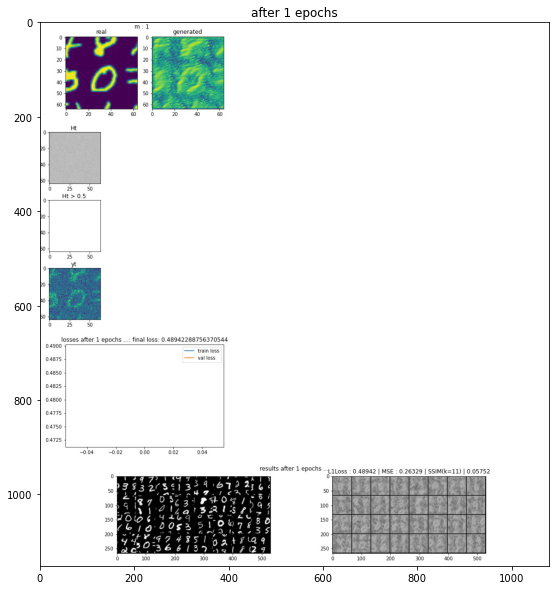

m : 1
yt range (train): [-0.3605170249938965 3.321782350540161]
yt range (test): [-0.3027721643447876 3.313751697540283]
training loop time (for single epoch): 4.195853233337402 sec
0.1666872 0.0962032


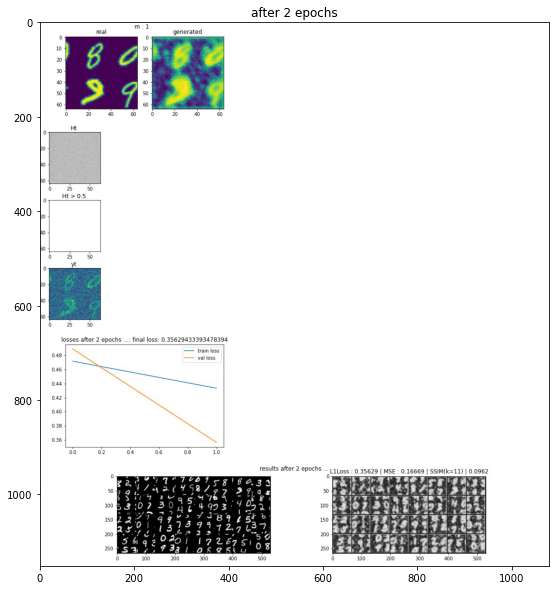

m : 1
yt range (train): [-0.3339616060256958 3.43625545501709]
yt range (test): [-0.37344908714294434 3.412853717803955]
training loop time (for single epoch): 4.0996997356414795 sec
0.1409091 0.1277033


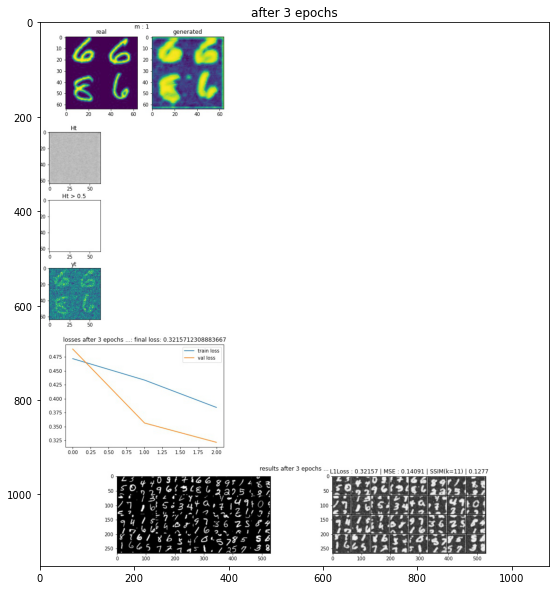

m : 1
yt range (train): [-0.42852699756622314 3.187507390975952]
yt range (test): [-0.4125802516937256 3.131890296936035]
training loop time (for single epoch): 4.100063323974609 sec
0.1114328 0.1737241


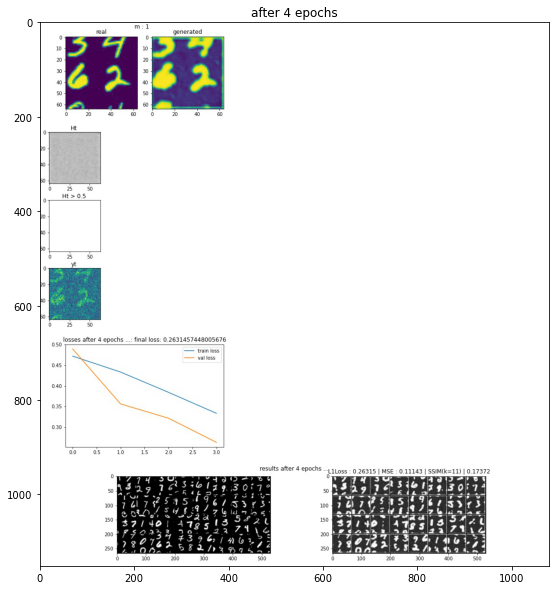

m : 1
yt range (train): [-0.3223789930343628 3.2059388160705566]
yt range (test): [-0.3278017044067383 3.159945249557495]
training loop time (for single epoch): 4.943904399871826 sec
0.1042173 0.1959916


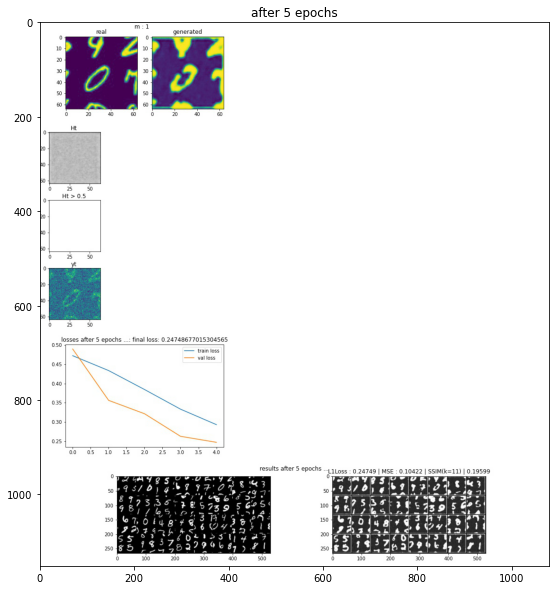

m : 1
ERROR : ../figs/mnistv12/img_size(64)@T(1)@rotation_lambda(10.0)@lr_H(1.0)@lambda_scale_factor(1)
Overide opts :  ['NAME', 'exp_idx(2)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/mnistv12/img_size(64)@T(1)@rotation_lambda(10.0)@lr_H(1.0)@lambda_scale_factor(2)', 'MODEL.MODEL_H.T', '1', 'MODEL.MODEL_H.lr_H', '1.0', 'MODEL.MODEL_H.enable_train', 'True', 'MODEL.MODEL_A.scale_factor', '2', 'MODEL.MODEL_A.rotation_lambda', '10.0', 'DATASET.img_size', '64', 'MODEL.MODEL_H.H_init', 'fft_uniform_unity', 'TRAIN.show_results_epoch', 1]
DATASET:
  batch_size: 32
  delta: 1e-06
  img_channels: 1
  img_size: 64
GENERAL:
  device: cuda:0
  save_dir: ../figs/mnistv12/img_size(64)@T(1)@rotation_lambda(10.0)@lr_H(1.0)@lambda_scale_factor(2)
  torch_seed: 10
MODEL:
  MODEL_A:
    exPSF: torch.tensor(impulse(side_len=5)).float().to(device)
    noise: True
    rotation_lambda: 10.0
    sPSF: torch.tensor(impulse(side_len=5)).float().to(device)
    scale_factor: 2
    shift_lambda_real

/n/home06/udithhaputhanthri/.conda/envs/deepTFM/lib/python3.6/site-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [ ]:
device= 'cuda:0'

Ts=['1', '2', '4', '8', '16', '32']
rotation_lambdas= ['10.0'] #['10.0', '100.0', '1000.0']
lr_Hs= ['1.0', '0.0']
img_sizes= ['64']
lambda_scale_factors= ['1', '2', '3']

do_exps(Ts, rotation_lambdas, lr_Hs, lambda_scale_factors, img_sizes, device, exp_dir = exp_dir, save_special= True)